In [3]:
import numpy as np
from numpy import linalg as la

In [4]:
A = np.array([
    [2, 5, 3],
    [1, 2, 1],
    [4, 1, 1],
    [3, 5, 2],
    [5, 3, 1],
    [4, 5, 5],
    [2, 4, 2],
    [2, 2, 5]])

la.svd(A, full_matrices=False)

(array([[-0.39458526,  0.23923575, -0.35445911],
        [-0.15830232,  0.03054913, -0.15299759],
        [-0.22155201, -0.52086121,  0.39334917],
        [-0.39692635, -0.08649009, -0.41052882],
        [-0.34630257, -0.64128825,  0.07382859],
        [-0.53347449,  0.19168874,  0.19949342],
        [-0.31660464,  0.06109826, -0.30599517],
        [-0.32840223,  0.45970413,  0.62354764]]),
 array([ 15.09626916,   4.30056855,   3.40701739]),
 array([[-0.54184808, -0.67070995, -0.50650649],
        [-0.75152295,  0.11680911,  0.64928336],
        [ 0.37631623, -0.73246419,  0.56734672]]))

In [5]:
square = A.T.dot(A)

print square

sing_squared, sing_vec = la.eig(square)

sing_val = [v**0.5 for v in sing_squared]

print sing_val

[[ 79  78  56]
 [ 78 109  74]
 [ 56  74  70]]
[15.096269162946603, 4.3005685533300779, 3.4070173873897338]


In [6]:
U, S, V = la.svd(A, full_matrices=False)
print U
print S
print V

print U.dot(np.diag(S)).dot(V)

V = V[:-1]
S = S[:-1]
U = np.array([r[:-1] for r in U])

print U.dot(np.diag(S)).dot(V)

[[-0.39458526  0.23923575 -0.35445911]
 [-0.15830232  0.03054913 -0.15299759]
 [-0.22155201 -0.52086121  0.39334917]
 [-0.39692635 -0.08649009 -0.41052882]
 [-0.34630257 -0.64128825  0.07382859]
 [-0.53347449  0.19168874  0.19949342]
 [-0.31660464  0.06109826 -0.30599517]
 [-0.32840223  0.45970413  0.62354764]]
[ 15.09626916   4.30056855   3.40701739]
[[-0.54184808 -0.67070995 -0.50650649]
 [-0.75152295  0.11680911  0.64928336]
 [ 0.37631623 -0.73246419  0.56734672]]
[[ 2.  5.  3.]
 [ 1.  2.  1.]
 [ 4.  1.  1.]
 [ 3.  5.  2.]
 [ 5.  3.  1.]
 [ 4.  5.  5.]
 [ 2.  4.  2.]
 [ 2.  2.  5.]]
[[ 2.45445768  4.11544082  3.68515533]
 [ 1.19616065  1.61819173  1.29573824]
 [ 3.49568076  1.98161003  0.23967174]
 [ 3.52634555  3.97551783  2.79353585]
 [ 4.90534318  3.1842406   0.85729227]
 [ 3.74422631  5.49783946  4.61438718]
 [ 2.3923213   3.23638346  2.59147647]
 [ 1.20053962  3.55607452  3.79470728]]


(768, 1024)


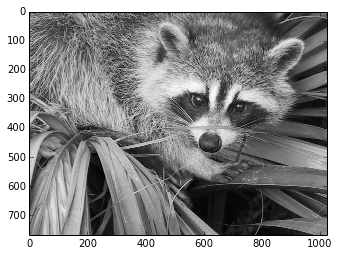

In [7]:
from scipy import misc
face = misc.face()
misc.imsave('face.png', face) # uses the Image module (PIL)
face = misc.imread('face.png', flatten=True)
print face.shape

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

(768, 768) (768,) (768, 1024)
-100 0.365019011407


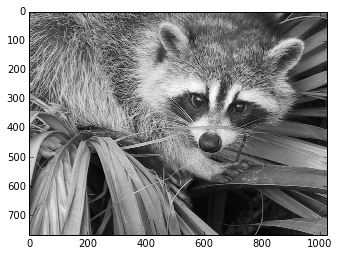

-200 0.403361344538


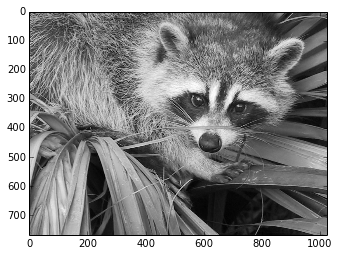

-300 0.450704225352


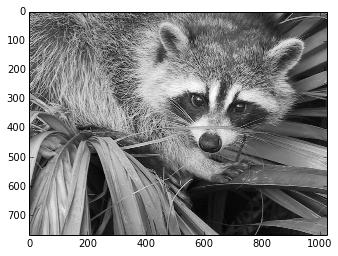

-400 0.510638297872


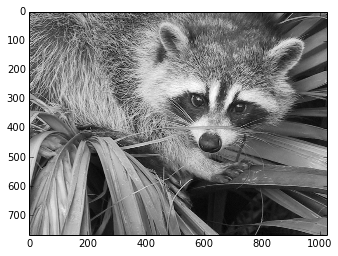

-500 0.588957055215


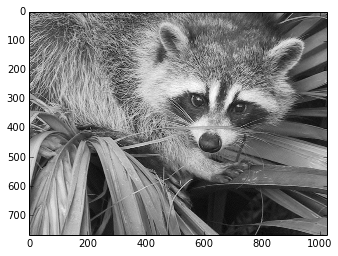

-600 0.695652173913


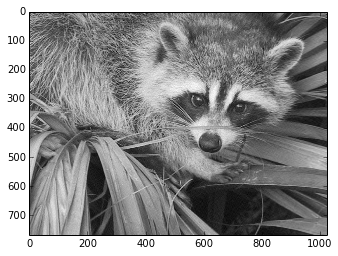

-700 0.849557522124


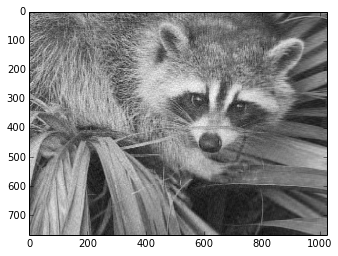

-710 0.868778280543


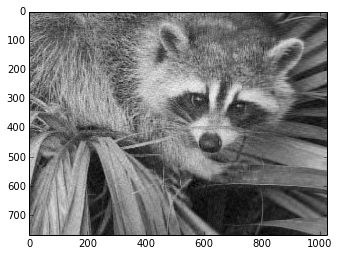

-720 0.888888888889


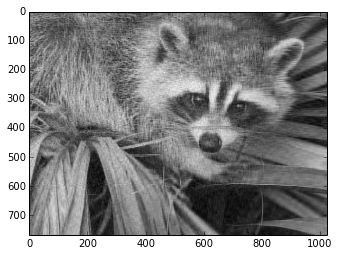

-730 0.909952606635


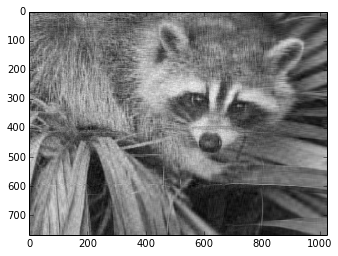

-740 0.932038834951


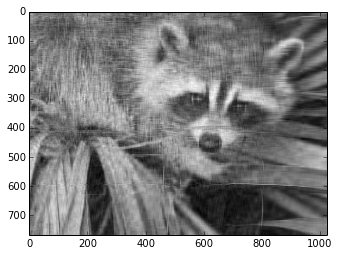

-750 0.955223880597


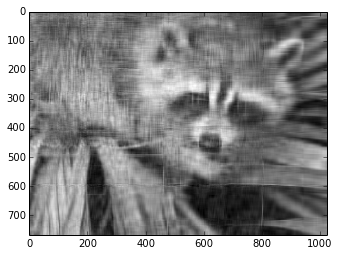

-760 0.979591836735


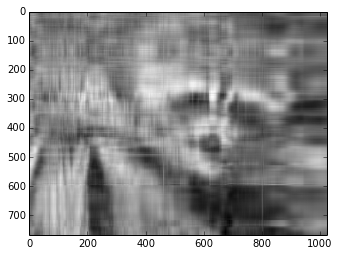

-760 0.979591836735


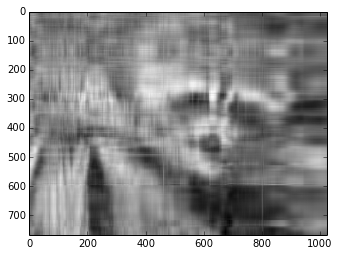

-761 0.982097186701


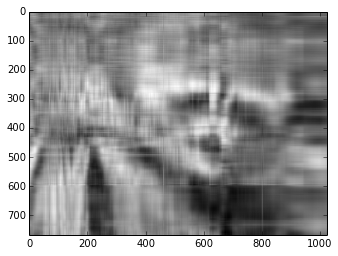

-762 0.984615384615


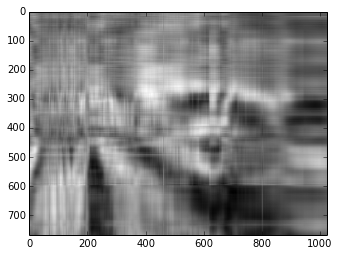

-763 0.987146529563


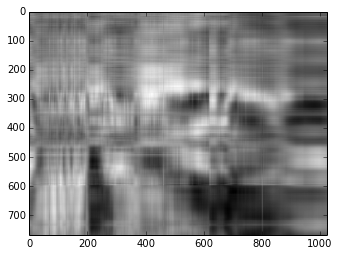

-764 0.989690721649


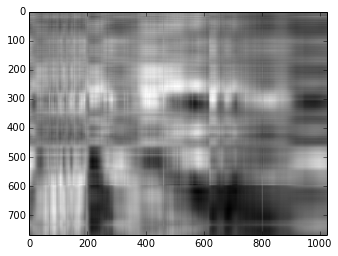

-765 0.992248062016


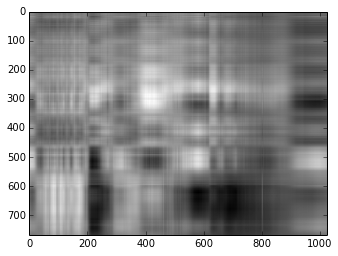

-766 0.99481865285


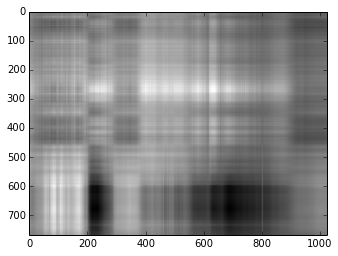

-767 0.997402597403


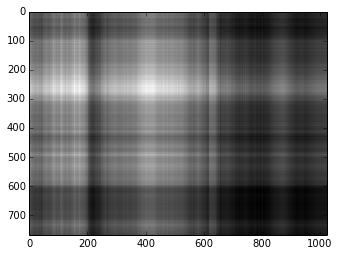

In [8]:
U, S, V = la.svd(face, full_matrices=False)
print U.shape, S.shape, V.shape

def make_worst(U, S, V, C):
    V = V[:C]
    S = S[:C]
    U = np.array([r[:C] for r in U])
    face2 = U.dot(np.diag(S)).dot(V)
    print C, float(len(face2)) / float((len(V) + len(U) + len(S)))

    plt.imshow(face2, cmap=plt.cm.gray)
    plt.show()
    
for C in range(-100, -800, -100):
    make_worst(U, S, V, C)
    
for C in range(-710, -768, -10):
    make_worst(U, S, V, C)
    
for C in range(-760, -768, -1):
    make_worst(U, S, V, C)